In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random


---


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
pat1= '/content/drive/MyDrive/Colab Notebooks/train'
pat2='/content/drive/MyDrive/Colab Notebooks/test'

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf


X_train=[]
y_train=[]

X_test=[]
y_test=[]
print(type(y_train))

for images in os.listdir(pat1):
    p= pat1+ '/'+images
    image=tf.keras.preprocessing.image.load_img(p, color_mode='rgb', target_size= (250,250))
    image=np.array(image)
    X_train.append(image)
    naam= images
    m=''
    for i in naam:
      if(i=='-'):
        break
      m+=i
    y_train.append(m)

    c = list(zip(X_train, y_train))
    random.shuffle(c)
    X_train, y_train = zip(*c)
    X_train=list(X_train)
    y_train=list(y_train)



for images in os.listdir(pat2):
    p= pat2+ '/'+images
    image=tf.keras.preprocessing.image.load_img(p, color_mode='rgb', target_size= (250,250))
    image=np.array(image)
    X_test.append(image)
    naam1= images
    n=''
    for i in naam1:
      if(i=='-'):
        break
      n+=i

    y_test.append(n)



<class 'list'>


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
foo = np.true_divide(X_train, 255.0)
X_train = foo
foo1 = np.true_divide(X_test, 255.0)
X_test = foo1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(250,250, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(250,250, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',input_shape=(250,250, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))

#ANN
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(5, activation='softmax'))





In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
tb= encoder.fit_transform(y_train)
ta=encoder.fit_transform(y_test)


In [ ]:
cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath="./best_model.h5", monitor="accuracy", verbose=1, save_best_only=True)

es = EarlyStopping(monitor="accuracy", min_delta=0.01, patience=5, verbose=1)
cb = [mc, es]

In [ ]:
historytrain=cnn.fit(X_train, tb, epochs=5,callbacks=cb,validation_data=(X_test,ta))

Epoch 1/5
59/59 [==============================] - ETA: 0s - loss: 0.5016 - accuracy: 0.3687
Epoch 1: accuracy improved from -inf to 0.36873, saving model to ./best_model.h5
59/59 [==============================] - 18s 78ms/step - loss: 0.5016 - accuracy: 0.3687 - val_loss: 0.3985 - val_accuracy: 0.5165
Epoch 2/5
59/59 [==============================] - ETA: 0s - loss: 0.3295 - accuracy: 0.6158
Epoch 2: accuracy improved from 0.36873 to 0.61580, saving model to ./best_model.h5
59/59 [==============================] - 2s 41ms/step - loss: 0.3295 - accuracy: 0.6158 - val_loss: 0.3183 - val_accuracy: 0.6538
Epoch 3/5
59/59 [==============================] - ETA: 0s - loss: 0.2228 - accuracy: 0.7764
Epoch 3: accuracy improved from 0.61580 to 0.77641, saving model to ./best_model.h5
59/59 [==============================] - 2s 42ms/step - loss: 0.2228 - accuracy: 0.7764 - val_loss: 0.2714 - val_accuracy: 0.7253
Epoch 4/5
59/59 [==============================] - ETA: 0s - loss: 0.1522 - accur

In [ ]:
historytest=cnn.evaluate(X_test,ta)

18/18 [==============================] - 0s 23ms/step - loss: 0.3011 - accuracy: 0.7637


In [ ]:
y_pred = cnn.predict(X_test)
print(y_test[:5])
print(y_pred[:5])
print(ta[:5])

18/18 [==============================] - 0s 18ms/step
['Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard']
[[3.7766549e-05 1.6512816e-01 8.3410853e-01 1.7374069e-04 5.5184704e-04]
 [2.6802252e-07 1.5875379e-08 9.9999774e-01 4.9215409e-08 2.0237567e-06]
 [2.8995211e-05 1.8448820e-05 9.9816173e-01 3.8452364e-07 1.7904306e-03]
 [4.5366633e-06 3.0031298e-08 9.9922609e-01 2.2640643e-08 7.6940499e-04]
 [5.5848477e-06 9.1872271e-06 9.9699461e-01 4.2425982e-06 2.9863680e-03]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [ ]:
# plt.plot(historytrain.history['accuracy'],[1,2,3,4,5,6,7,8,9,10,11,12,13])
# plt.legend(['train'],loc='upper left')



# plt.ylabel('epoch')
# plt.xlabel('accuracy')
# # plt.legend(['test'],loc='upper left')
# # plt.show





In [ ]:
# plt.plot(historytrain.history['loss'],[1,2,3,4,5,6,7,8,9,10,11,12,13])
# plt.legend(['loss'],loc='upper left')
# plt.ylabel('epoch')
# plt.xlabel('loss')

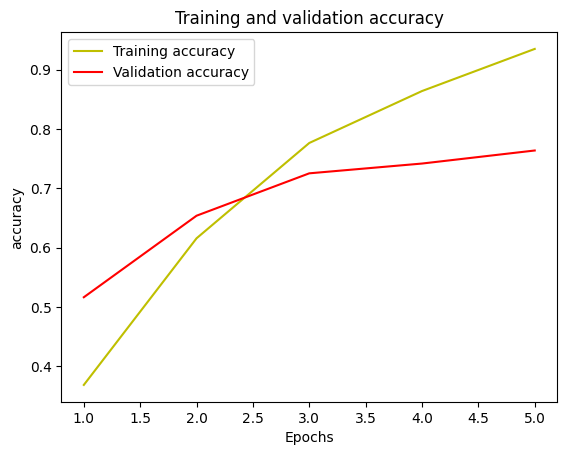

In [ ]:
loss = historytrain.history['accuracy']
val_loss = historytrain.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

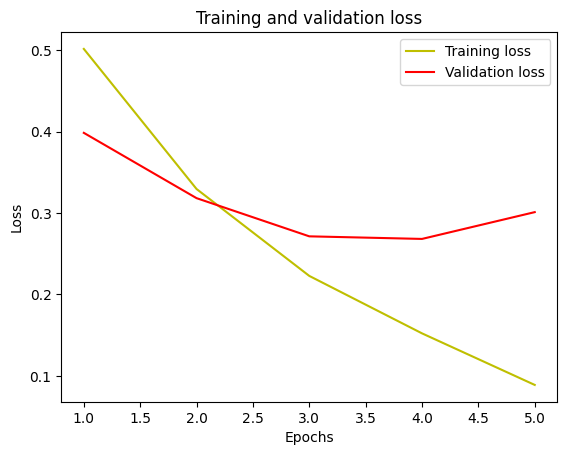

In [ ]:
loss = historytrain.history['loss']
val_loss = historytrain.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from matplotlib import path
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
model=load_model("/content/best_model.h5")


path="/content/Leopard-3-24.png"

img=load_img(path,target_size=(250,250))
i=img_to_array(img)
input_arr=np.array([i])

In [ ]:
# pred=np.array(model(np.array(input_arr),training=False))
arr=['cow','elephant','leopard','monkey','tiger']

pred = model.predict(np.array(input_arr))
for i in range(5):
  if int(pred[0][i])==1:
      print("Animal is " +arr[i])

# print(pred)

1/1 [==============================] - 0s 72ms/step
Animal is leopard


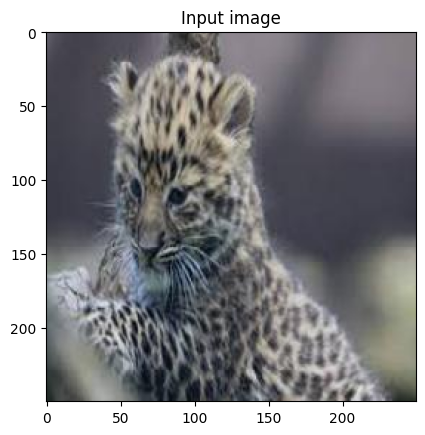

In [ ]:
plt.imshow(img)
plt.title("Input image")
plt.show()